### **Como executar este exemplo**
1. Instale as dependências:
   ```bash
   pip install minisom scikit-learn matplotlib


# Self-Organizing Map (SOM) com o Wine Dataset

## Introdução

O **Self-Organizing Map (SOM)** é uma técnica de aprendizado não supervisionado que combina **redução de dimensionalidade** e **clusterização**. Neste notebook, utilizaremos o dataset **Wine** para agrupar amostras de vinho com base em suas propriedades químicas.
# Explicação do Dataset Wine

## Descrição Geral

O **Wine Dataset** é um conjunto de dados clássico amplamente utilizado em aprendizado de máquina. Ele contém informações químicas de 178 amostras de vinho, pertencentes a três diferentes categorias (ou classes). Essas categorias são baseadas em variedades de uvas cultivadas na mesma região da Itália.

---

## Estrutura do Dataset

- **Número de Amostras**: 178.
- **Número de Atributos**: 13 (características químicas e físicas).
- **Número de Classes**: 3 (tipos de vinho).

---

## Atributos (Características)

Os atributos representam medições químicas e físicas de cada amostra de vinho:

1. **Álcool**: Porcentagem de álcool presente.
2. **Ácido málico**: Nível de acidez.
3. **Cinzas**: Quantidade de cinzas produzidas.
4. **Alcalinidade das cinzas**: Medição da alcalinidade.
5. **Magnésio**: Concentração de magnésio.
6. **Fenóis totais**: Quantidade total de compostos fenólicos.
7. **Flavonoides**: Subconjunto de fenóis.
8. **Fenóis não-flavonoides**: Fenóis que não são flavonoides.
9. **Proantocianidinas**: Concentração de proantocianidinas.
10. **Intensidade de cor**: Intensidade visual da cor do vinho.
11. **Matiz**: Tom de cor do vinho.
12. **OD280/OD315**: Razão de absorção de luz em dois comprimentos de onda específicos.
13. **Prolina**: Concentração do aminoácido prolina.

---

## Classes

O dataset contém três categorias (ou classes) de vinhos:
- **Classe 0**: Tipo de vinho 1.
- **Classe 1**: Tipo de vinho 2.
- **Classe 2**: Tipo de vinho 3.

Essas classes refletem diferentes variedades de uvas e métodos de produção.clib.pyplot as plt


## 1. Importar Bibliotecas

Primeiro, importamos as bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import matplotlib.pyplot as plt


## Carregar e Explorar o Dataset

O dataset Wine contém informações químicas sobre 178 amostras de vinho, classificadas em três categorias. Cada amostra é representada por 13 atributos contínuos.

Para começar, carregamos os dados e exploramos algumas informações básicas, como:
- **Amostras iniciais**: Exibição dos primeiros registros para entender a estrutura.
- **Distribuição das classes**: Verificar a quantidade de amostras em cada classe.
- **Resumo estatístico**: Analisar as principais estatísticas dos atributos, como média e desvio padrão.


In [2]:
# Carregar o dataset
data = load_wine()
X = data.data  # Atributos (características)
y = data.target  # Classes (rótulos)

# Criar um DataFrame para visualização
df = pd.DataFrame(X, columns=data.feature_names)
print("Primeiras amostras do dataset:")
print(df.head())

# Visualizar a distribuição das classes
print("\nDistribuição das classes:")
print(pd.Series(y).value_counts())


Primeiras amostras do dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines

## Pré-processamento

Antes de aplicar o **Self-Organizing Map (SOM)**, é necessário preparar os dados. O pré-processamento ajuda a garantir que o algoritmo funcione corretamente:

1. **Padronizar os dados**:
   - O SOM é sensível a diferenças de escala entre os atributos.
   - Usamos a padronização para garantir que todas as características tenham média 0 e desvio padrão 1.


In [3]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados padronizados prontos para uso no SOM.")


Dados padronizados prontos para uso no SOM.


## Configurar e Treinar o SOM

Configuramos um **Self-Organizing Map (SOM)** para organizar e agrupar os dados em um mapa bidimensional (2D). 

1. **Configuração do SOM**:
   - **Grid 2D**: Escolhemos um grid 10x10 para projetar os dados.
   - **Comprimento do input**: O número de características (13 no caso do dataset Wine).

2. **Treinamento**:
   - Durante o treinamento, o SOM ajusta os pesos dos neurônios para representar os dados de entrada.
   - Usamos 500 iterações para garantir que o SOM converge.


In [4]:
# Configurar o SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Inicializar pesos aleatórios
som.random_weights_init(X_scaled)

# Treinar o SOM
som.train_random(X_scaled, num_iteration=500)
print("Treinamento do SOM concluído.")

Treinamento do SOM concluído.


## Visualizar o SOM

Após o treinamento, podemos criar uma visualização do **Mapa de Distâncias** (U-Matrix), que mostra a densidade das ativações e a separação entre os neurônios no grid do SOM. O Mapa de Distâncias é útil para entender a organização dos dados no SOM e identificar possíveis clusters.

---

### **O que é o Mapa de Distâncias?**
O **Mapa de Distâncias** visualiza a similaridade entre os vetores de pesos dos neurônios adjacentes no grid do SOM:
- Cada célula do grid representa um neurônio.
- As cores no mapa indicam a distância média entre os pesos do neurônio e os pesos de seus vizinhos.

---

### **Interpretação das Cores no Mapa**
- **Áreas Escuras (Baixa Distância)**:
  - Representam regiões onde os neurônios têm pesos semelhantes.
  - Geralmente indicam clusters densos, ou seja, dados que possuem características muito similares.
  
- **Áreas Claras (Alta Distância)**:
  - Representam regiões onde os neurônios têm pesos muito diferentes.
  - Indicam transições ou limites entre clusters diferentes.

---

### **Para que serve o Mapa de Distâncias?**
1. **Identificar Clusters**:
   - Regiões escuras representam agrupamentos densos de dados similares.
   - Regiões claras ajudam a identificar limites ou separações entre os clusters.

2. **Exploração Visual**:
   - O Mapa de Distâncias fornece uma visão intuitiva sobre como os dados foram organizados no SOM.
   - Ajuda a explorar a estrutura dos dados e verificar se o SOM capturou bem os padrões.

3. **Validação dos Resultados**:
   - Permite validar a qualidade da organização dos dados no grid do SOM.

---

### **Código para Visualização**
```python
# Visualizar o SOM com mapa de distância
plt.figure(figsize=(10, 8))
plt.title("Mapa de Distâncias (U-Matrix)")
distance_map = som.distance_map()
plt.pcolor(distance_map, cmap='coolwarm')
plt.colorbar(label='Distância média')
plt.show()



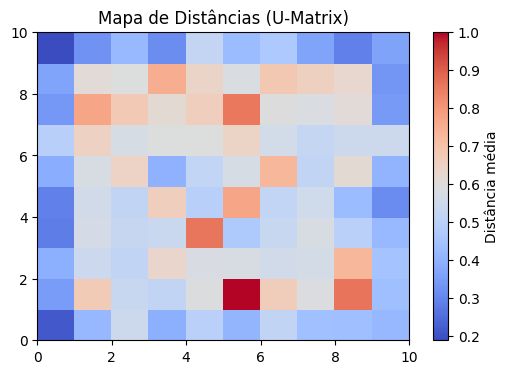

In [5]:
# Visualizar o SOM com mapa de distância
plt.figure(figsize=(6, 4))
plt.title("Mapa de Distâncias (U-Matrix)")
distance_map = som.distance_map()
plt.pcolor(distance_map, cmap='coolwarm')
plt.colorbar(label='Distância média')
plt.show()

## Mapear as Classes no SOM

Podemos sobrepor os rótulos das classes no mapa treinado para avaliar como o SOM organizou os dados.

- Cada ponto no grid representa um neurônio.
- As classes são atribuídas com base nos dados mais próximos do neurônio correspondente.


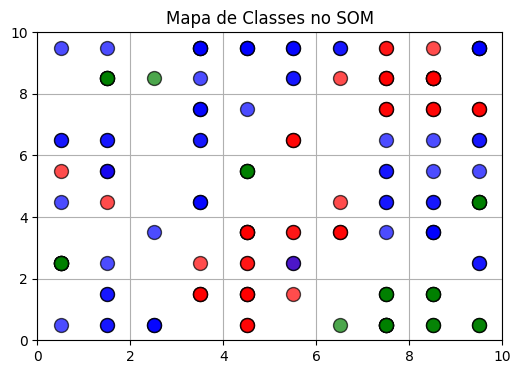

In [6]:
# Criar um grid com classes mapeadas
plt.figure(figsize=(6, 4))

# Paleta de cores para as classes
colors = ['red', 'blue', 'green']

# Tamanho do grid
x_dim, y_dim = 10, 10  # Substitua pelos valores usados na inicialização do SOM

# Mapear cada ponto para o BMU
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Neurônio vencedor
    # Adicionar pontos coloridos para cada classe
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=colors[y[i]], 
             markeredgecolor='k', markersize=10, alpha=0.7)

plt.title("Mapa de Classes no SOM")
plt.xlim([0, x_dim])
plt.ylim([0, y_dim])
plt.grid()
plt.show()
